# TP1

In [75]:
# import des librairies nécessaires
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [76]:
data_si = pd.read_excel('./Data/Climat.xlsx', header=2, usecols='D:O').loc[1:31]
data_si.shape

/config/.local/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


(31, 12)

In [77]:
data_si_erreur = pd.read_excel('./Data/Climat.xlsx', sheet_name='SI -erreur', header=2, usecols='D:O').loc[1:31]

for column in data_si_erreur:
    for index, value in data_si_erreur.iterrows():
        if index < 2 or index > 30:
            continue
        
        if type(value[column]) == str:
            data_si_erreur[column][index] = (data_si_erreur[column][index - 1] + data_si_erreur[column][index + 1]) / 2
            continue

data_si_erreur.shape


/config/.local/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


(31, 12)

## Calcul des ...

### Calcul des moyennes

In [78]:
data_si.mean(axis=0)

janvier      -8.967742
février      -4.928571
mars          1.193548
avril         8.000000
mai          12.903226
juin         17.033333
juillet      18.322581
août         17.838710
septembre    10.500000
octobre       3.870968
novembre     -0.333333
décembre     -7.000000
dtype: float64

In [79]:
data_si_erreur.mean(axis=0)

janvier      -8.967742
février      -4.928571
mars          1.241935
avril         8.000000
mai          12.903226
juin         17.000000
juillet      17.693548
août         19.322581
septembre    10.500000
octobre       3.822581
novembre     -0.333333
décembre     -7.967742
dtype: float64

### Calcul des écart-types

In [80]:
data_si.std(axis=0)


janvier      4.490611
février      4.561746
mars         3.506369
avril        3.151354
mai          4.036127
juin         3.011281
juillet      3.571994
août         2.696872
septembre    2.330458
octobre      1.802627
novembre     3.717000
décembre     2.065591
dtype: float64

In [81]:
data_si_erreur.std(axis=0)

janvier      4.490611
février      4.561746
mars         3.542294
avril        3.151354
mai          4.036127
juin         3.039964
juillet      5.616460
août         8.541612
septembre    2.330458
octobre      1.791407
novembre     3.717000
décembre     5.029804
dtype: float64

### Calcul des minimum par mois et années

In [82]:
data_si.min(axis=0)

janvier       -23
février     -12.0
mars         -8.0
avril         2.0
mai           5.0
juin         11.0
juillet      13.0
août         14.0
septembre     6.0
octobre       1.0
novembre     -8.0
décembre    -11.0
dtype: object

In [83]:
data_si_erreur.min(axis=0)

janvier       -23
février     -12.0
mars           -8
avril         2.0
mai           5.0
juin           11
juillet        -6
août         14.0
septembre     6.0
octobre         1
novembre     -8.0
décembre    -33.0
dtype: object

In [84]:
print("Min SI: " + str(min(data_si.min(axis=0))))
print("Min SI-erreur: " + str(min(data_si_erreur.min(axis=0))))

Min SI: -23
Min SI-erreur: -33.0


### Calcul des maximums par mois et années

In [85]:
data_si.max(axis=0)

janvier        -3
février       5.0
mars          7.0
avril        16.0
mai          18.0
juin         22.0
juillet      26.0
août         26.0
septembre    16.0
octobre       7.0
novembre      5.0
décembre     -3.0
dtype: object

In [86]:
data_si_erreur.max(axis=0)

janvier        -3
février       5.0
mars            7
avril        16.0
mai          18.0
juin           22
juillet        26
août         63.0
septembre    16.0
octobre         7
novembre      5.0
décembre     -3.0
dtype: object

In [87]:
print("Max SI: " + str(max(data_si.max(axis=0))))
print("Max SI-erreur: " + str(max(data_si_erreur.max(axis=0))))

Max SI: 26.0
Max SI-erreur: 63.0


## Tracé graphique

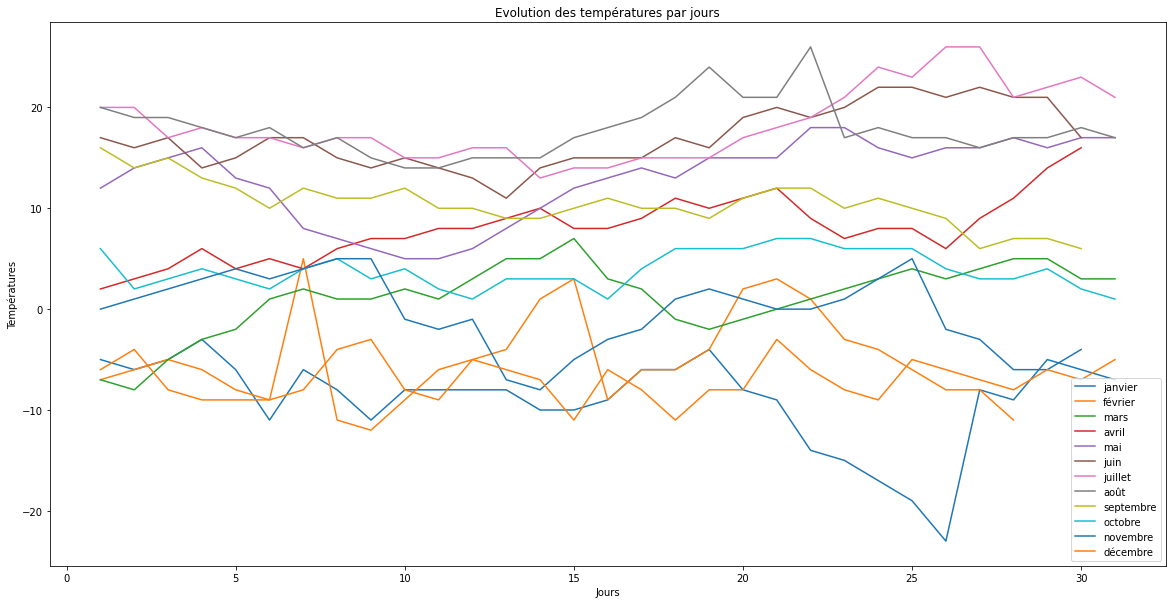

In [88]:
plt.figure(figsize=(20,10))
plt.xlabel('Jours')
plt.ylabel('Températures')
plt.title('Evolution des températures par jours')
plt.plot(data_si.loc[1:], label=data_si.columns.values)
plt.legend()
plt.show()

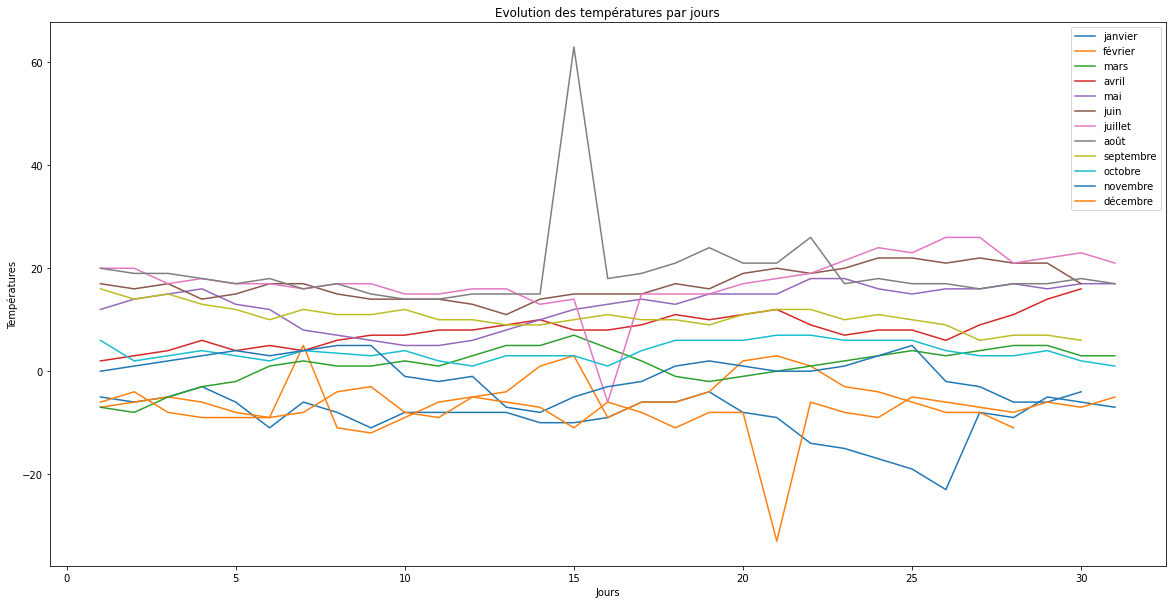

In [89]:
plt.figure(figsize=(20,10))
plt.xlabel('Jours')
plt.ylabel('Températures')
plt.title('Evolution des températures par jours')
plt.plot(data_si_erreur.loc[1:], label=data_si_erreur.columns.values)
plt.legend()
plt.show()

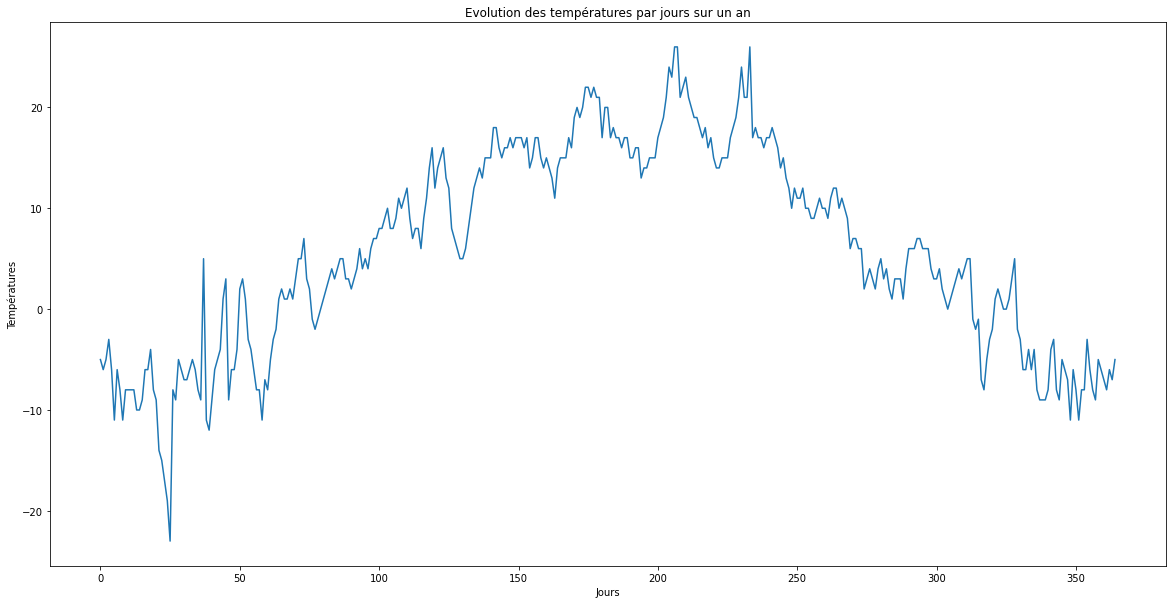

In [90]:
data_si_year = []

for column in data_si:
    for value in data_si[column].dropna().values:
        data_si_year.append(value)

plt.figure(figsize=(20,10))
plt.xlabel('Jours')
plt.ylabel('Températures')
plt.title('Evolution des températures par jours sur un an')
plt.plot(data_si_year)
plt.show()

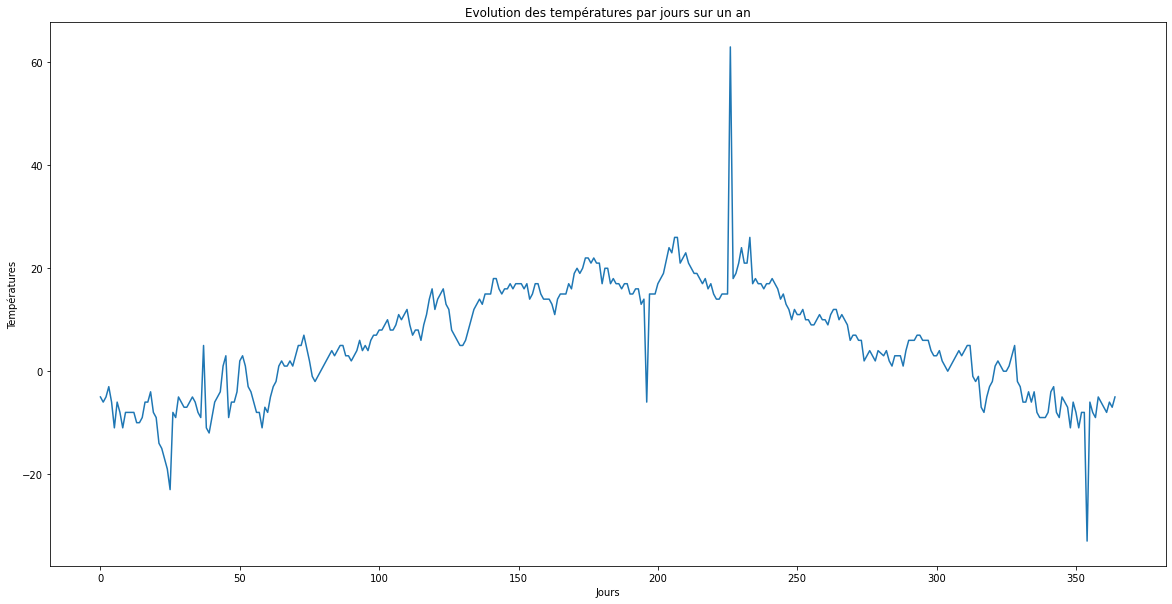

In [91]:
data_si_erreur_year = []

for column in data_si_erreur:
    for value in data_si_erreur[column].dropna().values:
        data_si_erreur_year.append(value)

plt.figure(figsize=(20,10))
plt.xlabel('Jours')
plt.ylabel('Températures')
plt.title('Evolution des températures par jours sur un an')
plt.plot(data_si_erreur_year)
plt.show()

## Pourquoi présenter la valeur lue sur une fenêtre glissante de 15 jours ?

Sur un graphique, ajouter une fenêtre nous permet d'observer les variations des températures sur une période de 30 jours. Ceci dans le but de voir si les températures s'inscrivent correctement dans leur contexte.

In [92]:
# mettre ici le jour que l'on souhaite observer
jour = 100

print("Moyenne sur 30 jours: " + str(np.mean(data_si_erreur_year[jour - 15 : jour + 15])))
print("Ecart-type sur 30 jours: " + str(np.std(data_si_erreur_year[jour - 15 : jour + 15])))

Moyenne sur 30 jours: 6.8
Ecart-type sur 30 jours: 2.6758176320519302


## Trouver les outliers et les remplacer

In [93]:
for column in data_si_erreur:

    q1, q3 = np.percentile(data_si_erreur[column], [25, 75])
    interquartile = q3 - q1
        

    for index, value in data_si_erreur.iterrows():
        if index < 2 or index > 30:
            continue

        if value[column] < q1 - 1.5 * interquartile or value[column] > q3 + 1.5 * interquartile:
            data_si_erreur[column][index] = (data_si_erreur[column][index - 1] + data_si_erreur[column][index + 1]) / 2
            continue


data_si_erreur

/tmp/ipykernel_58151/2139125667.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_si_erreur[column][index] = (data_si_erreur[column][index - 1] + data_si_erreur[column][index + 1]) / 2


,janvier,février,mars,avril,mai,juin,juillet,août,septembre,octobre,novembre,décembre
1,-5,-7.0,-7,2.0,12.0,17,20,20.0,16.0,6,0.0,-6.0
2,-6,-6.0,-6.0,3.0,14.0,16,20,19.0,14.0,2,1.0,-4.0
3,-5,-5.0,-5,4.0,15.0,17,17,19.0,15.0,3,2.0,-8.0
4,-3,-6.0,-3,6.0,16.0,14,18,18.0,13.0,4,3.0,-9.0
5,-6,-8.0,-2,4.0,13.0,15,17,17.0,12.0,3,4.0,-9.0
6,-11,-9.0,1,5.0,12.0,17,17,18.0,10.0,2,3.0,-9.0
7,-6,5.0,2,4.0,8.0,17,16,16.0,12.0,4,4.0,-8.0
8,-8,-11.0,1,6.0,7.0,15,17,17.0,11.0,3.5,5.0,-4.0
9,-11,-12.0,1,7.0,6.0,14,17,15.0,11.0,3,5.0,-3.0
10,-8,-9.0,2,7.0,5.0,14.0,15,14.0,12.0,4,-1.0,-8.0


## Comparaison des valeurs après correction des données

### Solution mathématique

In [95]:
data_si_erreur.mean(axis=0)

janvier      -8.709677
février      -4.928571
mars          1.306452
avril         8.000000
mai          12.903226
juin         17.000000
juillet      18.354839
août         17.500000
septembre    10.500000
octobre       3.822581
novembre     -0.333333
décembre     -7.129032
dtype: float64

Nous pouvons voir ci-dessus que les moyennes mensuelles sont désormais plus proches du dataframe SI (avec les valeurs correctes).

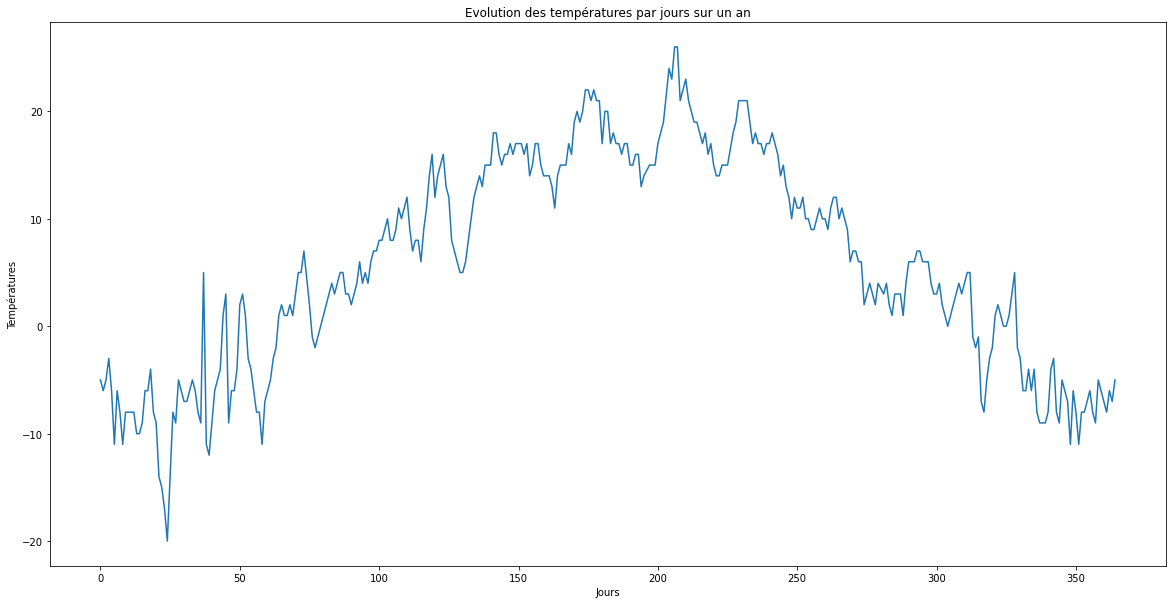

In [96]:
data_si_erreur_year = []

for column in data_si_erreur:
    for value in data_si_erreur[column].dropna().values:
        data_si_erreur_year.append(value)

plt.figure(figsize=(20,10))
plt.xlabel('Jours')
plt.ylabel('Températures')
plt.title('Evolution des températures par jours sur un an')
plt.plot(data_si_erreur_year)
plt.show()

La courbe est elle aussi plus proche de la courbe obtenue avec le fichier SI des bonnes valeurs.